In [1]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import regionate
import matplotlib.pyplot as plt
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')
import xbudget
import cftime
import cmocean
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [2]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.*.nc", chunks={"time":1}).thetao
#snap = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily_snap*.nc", chunks={"time":1})
#static = xr.open_dataset("/pub/hfdrake/datasets/CM4_MHW_blobs/data/WMT_monthly/ocean_month_rho2.static.nc")#chunks={'time':1})

In [ ]:
# # Merge snapshots with time-averages
# snap = snap.rename({
#     **{'time':'time_bounds'},
#     **{v:f"{v}_bounds" for v in snap.data_vars}
# })
# ds = xr.merge([ds.sel(time=ds.time[1:]), snap])
# ds = xr.merge([static,ds],join='inner')

# def add_estimated_layer_interfaces(ds):
#     return ds.assign_coords({"zi": xr.DataArray(
#         np.concatenate([[0], 0.5*(ds.zl.values[1:]+ds.zl.values[0:-1]), [6000]]),
#         dims=('zi',)
#     )})

# ds = add_estimated_layer_interfaces(ds) 

# # Add core coordinates of static to ds
# ds = ds.assign_coords({
#     "areacello": xr.DataArray(ds["areacello"].values, dims=('yh', 'xh',)), # Required for area-integration
#     "lon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
#     "lat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)), # Required for calculating density if not already provided!
#     "xq": xr.DataArray(ds["xq"].values, dims=('xq',)),
#     "yq": xr.DataArray(ds["yq"].values, dims=('yq',)),
#     "deptho": xr.DataArray(ds["deptho"].values, dims=('yh', 'xh',)),
#     "geolon": xr.DataArray(ds["geolon"].values, dims=('yh', 'xh',)),
#     "geolat": xr.DataArray(ds["geolat"].values, dims=('yh', 'xh',)),
#     "geolon_c": xr.DataArray(ds["geolon_c"].values, dims=('yq', 'xq',)),
#     "geolat_c": xr.DataArray(ds["geolat_c"].values, dims=('yq', 'xq',)),
# })

# # xgcm grid for dataset
# coords = {
#     'X': {'center': 'xh', 'outer': 'xq'},
#     'Y': {'center': 'yh', 'outer': 'yq'},
#     'Z': {'center': 'zl', 'outer': 'zi'}
# }
# #'Z': {'center': 'rho2_l', 'outer': 'rho2_i'}
# #'Z': {'center': 'zl', 'outer': 'zl'}
# metrics = {
#     ('X','Y'): "areacello", # Required for area-integration
# }

# ds['tos'] = ds['thetao'].isel(zl=0)
# #ds['sos'] = ds['so'].isel(zl=0)

# grid = xgcm.Grid(ds.copy(), coords=coords, metrics=metrics, boundary={'X':'extend', 'Y':'extend', 'Z':'extend'}, autoparse_metadata=False)

# wm = xwmt.WaterMass(grid)
# wm.grid._ds

# import xbudget
# budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly").copy()
# del budgets_dict['salt']['lhs']
# del budgets_dict['salt']['rhs']

# xbudget.collect_budgets(grid, budgets_dict)

# import numpy as np
# import regionate
# import matplotlib.pyplot as plt

# # Note: the properties of this region are quite different from the rest of the Baltic!
# name = "MANSO"
# #lons = np.array([8.,   20.,  29., 24.5, 24.5, 26.1, 17.5, 11.5])
# #lons = np.arange([-138, 0, 3.4])
# lons = np.array([-138.,-120.,-100., -70., -70., -100., -120., -138.])
# #lats = np.arange(8, 49, 1)
# lats = np.array([10., 10., 10., 10., 38., 38., 38., 38.])
# #lats = np.array([53.5, 53.5, 54.5,  59.,  61.,  63., 64.5,  62.])
# manso_region = regionate.GriddedRegion(name, lons, lats, grid)

# plt.figure(figsize=(4.75,3.5))
# pc = plt.pcolor(
#     grid._ds['geolon_c'],
#     grid._ds['geolat_c'],
#     grid._ds['deptho'],
#     cmap="viridis_r"
# )
# plt.colorbar(pc, label="depth [m]")
# plt.plot(regionate.loop(manso_region.lons), regionate.loop(manso_region.lats), color="k");
# plt.xlabel("longitude");
# plt.ylabel("latitude");
# plt.xlim(np.min(lons), np.max(lons))
# plt.ylim(np.min(lats), np.max(lats))

# # #plt.xlim(-200,5)
# # #plt.ylim(-10,80)

In [ ]:
# import warnings

# lam = "heat"
# with warnings.catch_warnings():
#     warnings.simplefilter(action='ignore', category=FutureWarning)
#     wmb = xwmb.WaterMassBudget(
#         grid,
#         budgets_dict,
#         manso_region.mask
#     )
#     wmb.mass_budget(lam, greater_than=True, default_bins=True)
#     wmt = wmb.wmt


In [6]:
gomregion = ds.sel(xh=slice(-98, -76),yh=slice(18,31))
gomregion_mean = gomregion.mean(["xh","yh"]).load()
gomregion_mean = gomregion_mean.transpose()

In [44]:
gomregion_max = gomregion.max("time").load()
gomregion_max = gomregion_max.transpose()

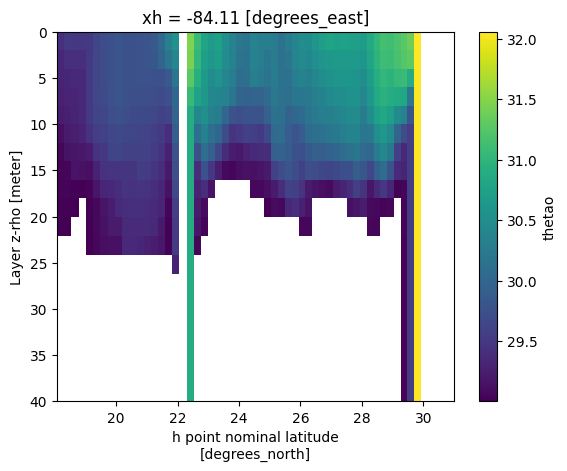

In [60]:
gomregion_max.transpose().sel(xh=-84,method='nearest').where(gomregion_max.sel(xh=-84,method='nearest')>29).plot()
plt.ylim(40,0)
plt.show()

KeyError: "'time' is not a valid dimension or coordinate for Dataset with dimensions Frozen({'xh': 86, 'yh': 57, 'zl': 75})"

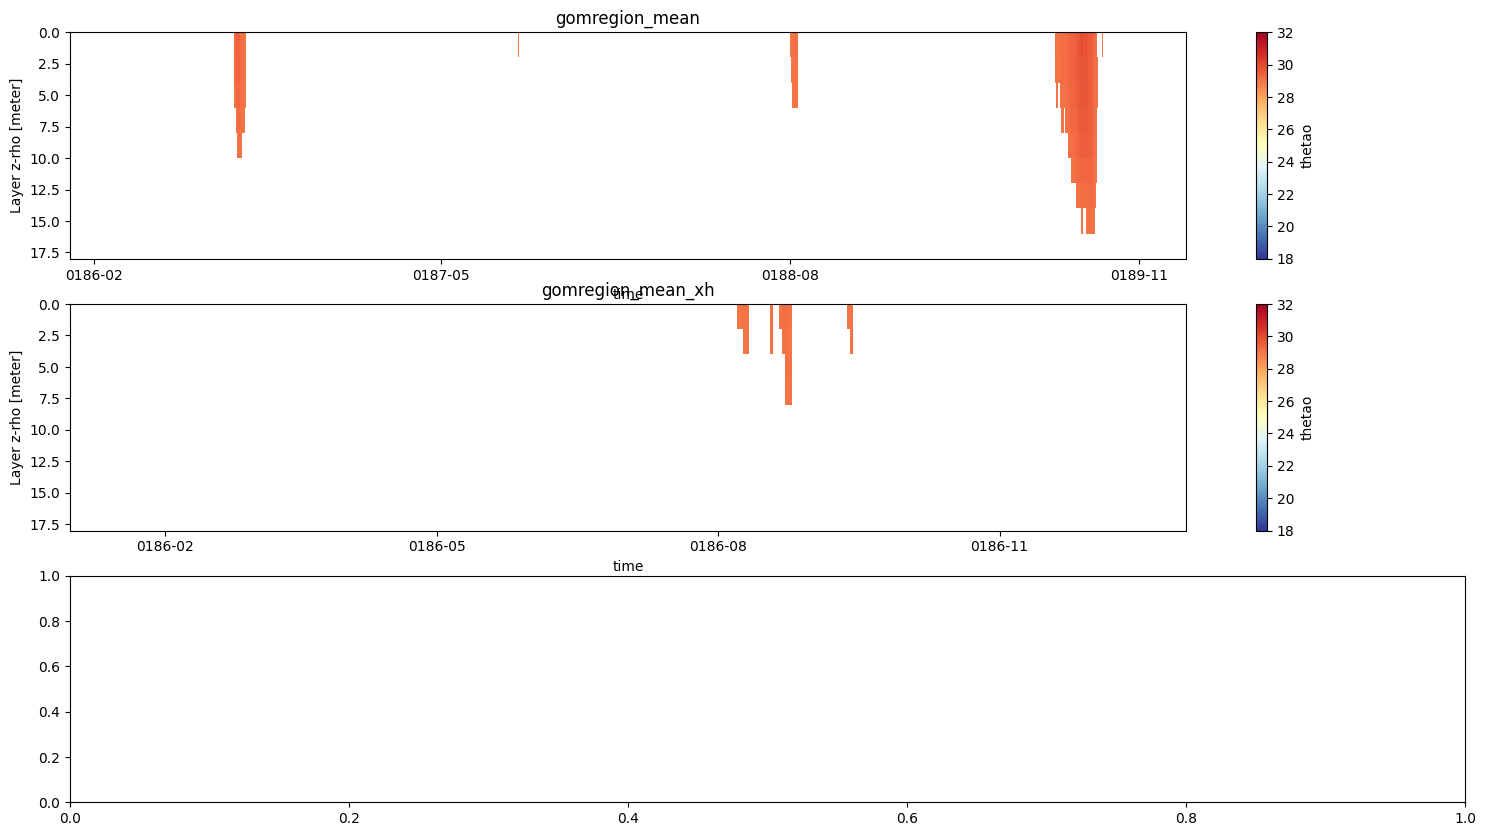

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 10))
h=18
gomregion_mean.where(gomregion_mean > 29).plot(
    ax=ax1, x='time', y='zl', cmap='RdYlBu_r', vmin=18, vmax=32, add_colorbar=True
)
ax1.set_ylim(h, 0)
ax1.set_title("gomregion_mean")

year2="0186"
gomregion_mean_xh.sel(time=slice(year2,year2)).where(gomregion_mean_xh > 29).plot(
    ax=ax2, x='time', y='zl', cmap='RdYlBu_r', vmin=18, vmax=32, add_colorbar=True
)
ax2.set_ylim(h, 0)
ax2.set_title("gomregion_mean_xh")

year3="0188"
gomregion_max.sel(time=slice(year3,year3)).where(gomregion_max > 29).plot(
    ax=ax3, x='time', y='zl', cmap='RdYlBu_r', vmin=18, vmax=32, add_colorbar=True
)
ax3.set_ylim(h, 0)
ax3.set_title("gomregion_mean_xh")

plt.tight_layout()
plt.show()

(100.0, 0.0)

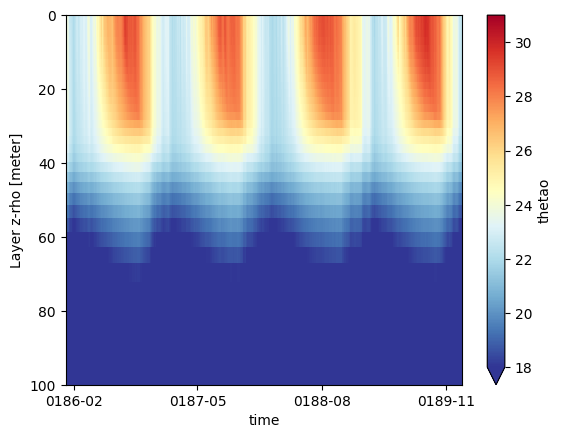

In [32]:
gomregion_mean.plot(x='time', y='zl', cmap='RdYlBu_r',vmin=18,vmax=31) #.where(gomregion_mean > 29)
plt.ylim(h, 0)

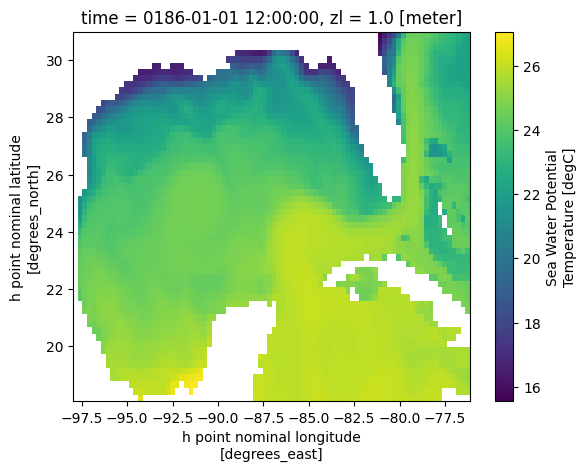

In [18]:
gomregion.isel(time=0,zl=0).plot()

In [29]:
gomregion_mean_xh = gomregion.sel(yh=22,method="nearest").mean("xh").transpose().load()

(100.0, 0.0)

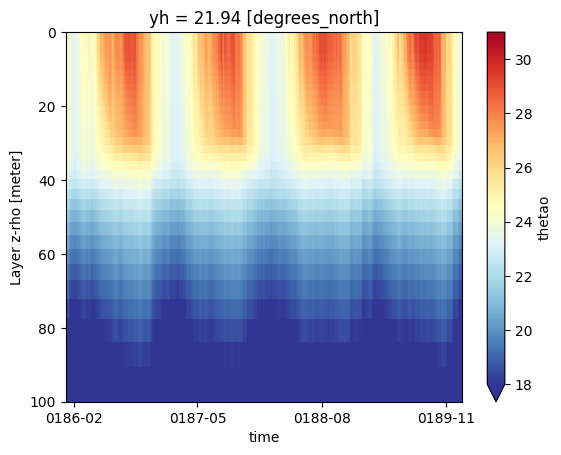

In [30]:
h=100
gomregion_mean_xh.plot(x='time', y='zl', cmap='RdYlBu_r',vmin=18,vmax=31) #.where(gomregion > 29)
plt.ylim(h, 0)

In [ ]:
# h=35
# #plt.xlim(-98, -75)
# ax.set_ylim(h, 0)
# ax.set_xlim(-98, -75)

In [36]:
#wm.grid._ds['thetao'].isel(time=0).isel(zl=5).sel(yh=slice(9,38)).sel(xh=slice(-138,-70)).plot()

In [ ]:
##Trying stuff out

(40.0, 0.0)

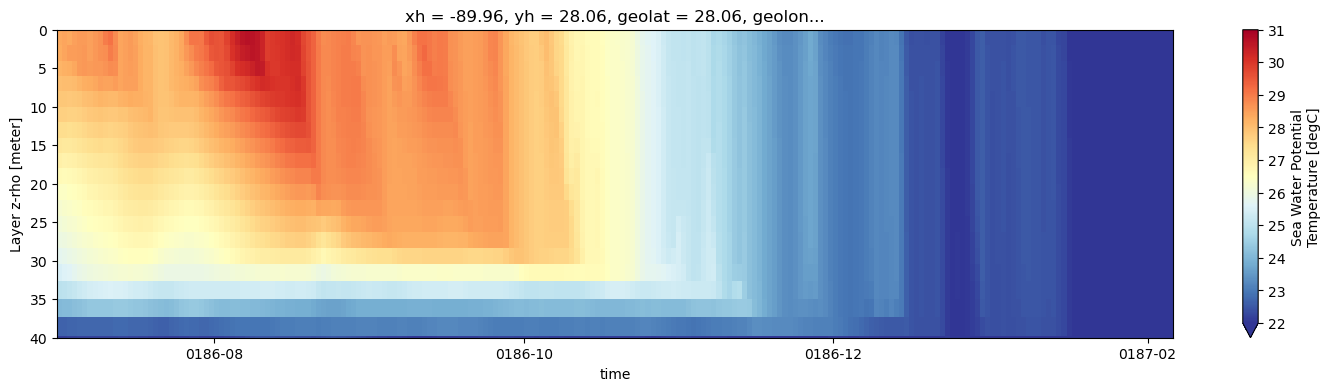

In [105]:
# plt.figure(figsize=(18,4))
# temp_test.plot(x='time', y='zl', cmap='RdYlBu_r',vmin=22,vmax=31) #, yincrease=False
# plt.ylim(40, 0)

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming 'wm.grid_ds' is your xarray dataset containing temperature data
# Select the temperature data and slice for a specific 3-day period
# You can adjust the time slice according to your data's actual time dimension
temp_test = wm.grid_ds['thetao'].sel(yh=28, method="nearest").sel(xh=slice(-138, -70))

# Select a time range for 3 days (adjust based on your dataset's time resolution)
temp_3days = temp_test.sel(time=slice('2020-01-01', '2020-01-03'))  # Example time slice

# Define time and depth variables
# Replace 'rho' with your actual depth variable name if different
time = temp_3days['time']
depth = temp_3days['rho']  # Or 'depth' if your dataset has that instead

# Plot temperature evolution over time and depth using pcolormesh or imshow
fig, ax = plt.subplots(figsize=(10, 6))

# Using pcolormesh for a filled temperature evolution plot
pcm = ax.pcolormesh(time, depth, temp_3days.transpose('time', 'rho'), cmap='RdYlBu_r', shading='auto')

# Add axis labels and a title
ax.set_xlabel('Time')
ax.set_ylabel('Depth [m]')
ax.set_title('Temperature Evolution over Depth (3 Days)')

# Reverse the y-axis to make depth increase downward
ax.invert_yaxis()

# Add a color bar to show temperature scale
cbar = plt.colorbar(pcm, ax=ax)
cbar.set_label('Temperature [°C]')

# Show the plot
plt.show()

In [ ]:
time_steps = event.time.size
cols = 4
rows = (time_steps + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 3.5 * rows), subplot_kw={'projection': ccrs.PlateCarree()})

axes = axes.flatten()

for time in range(time_steps):
    # Plot for the specific time index in the corresponding subplot
    ds_static_region.tos.sel(time=event.time[time].values).where(event_mask.sel(time=event.time[time].values)).plot(
        ax=axes[time],
        levels=np.arange(28, 31.6, 0.2),
        colors=cmo.thermal,
        add_colorbar=True
    )

    axes[time].coastlines()
    # Set the title for each subplot
    axes[time].set_title(f"Time: {event.time.values[time]}")


for idx in range(time_steps, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
#plt.savefig('/pub/mariant3/WarmWaterMasses/figures/paper/MHW25-temp-evolution-0186-paper.png', bbox_inches='tight')


plt.show()


In [26]:
temp = wm.grid._ds['thetao'].isel(time=7).sel(yh=28, method="nearest").sel(xh=slice(-138,-70)).compute()
z_section = wm.grid._ds['z'].isel(time=7).sel(yh=28, method="nearest").sel(xh=slice(-138,-70)).compute()

In [18]:
dates_evo = {
    'day1': (186, 6, 30), #No MHW
    'day2': (186, 7, 15), #No MHW
    'day3': (186, 7, 26), #MHW
    'day4': (186, 8, 3), #MHW
    'day5': (186, 8, 10), #MHW
    'day6': (186, 8, 21), #MHW
    'day7': (186, 8, 28), #MHW
    'day8': (186, 9, 5), #MHW
    'day9': (186, 9, 15), #MHW
    'day10': (186, 9, 30), #No MHW
    'day11': (186, 10, 5), #No MHW
    'day12': (186, 10, 15), #No MHW
}

In [19]:
def convert_to_date_string(date_tuple):
    year, month, day = date_tuple
    return f"{year:04d}-{month:02d}-{day:02d}"

In [134]:
day = 'day3'

In [135]:
day_save = dates_evo[f'{day}']
date_save = convert_to_date_string(day_save)
date_save

'0186-07-26'

In [136]:
import cftime
import cmocean

In [137]:
date_sel = cftime.DatetimeNoLeap(dates_evo[f'{day}'][0], dates_evo[f'{day}'][1], dates_evo[f'{day}'][2])

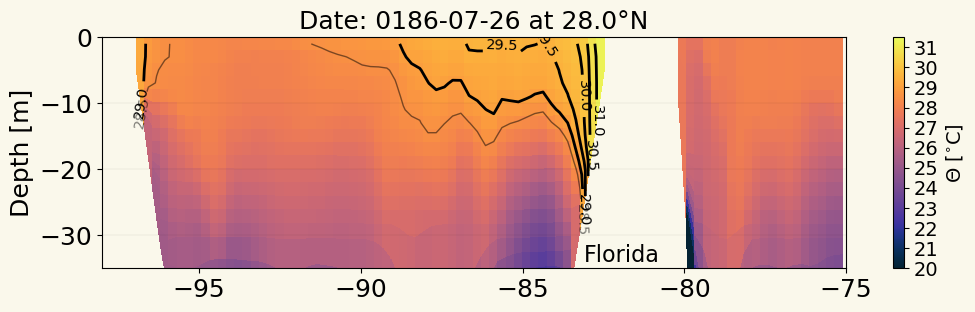

In [138]:
yh=28
temp = wm.grid._ds['thetao'].sel(time=date_sel, method="nearest").sel(yh=yh, method="nearest").sel(xh=slice(-98, -75)).compute()
z_section = wm.grid._ds['z'].sel(time=date_sel, method="nearest").sel(yh=yh, method="nearest").sel(xh=slice(-98, -75)).compute()

#y = z_section.time.dt.year.values
#m = z_section.time.dt.month.values
#d = z_section.time.dt.day.values
back_color='#faf8eb' #'#faf8eb' yeallowish for presentation

fig, ax = plt.subplots(figsize=(12, 3), facecolor=back_color)  # Updated figsize
ax.set_facecolor(back_color)

fontsize=18
min=20
max=31.5
plt.pcolor(
    z_section.xh * xr.ones_like(z_section.zl),
    z_section,
    temp.transpose(),
    vmin=min,
    vmax=max,
    cmap=cmocean.cm.thermal
)

colorbar = plt.colorbar()
colorbar.set_label((r"$\Theta$ [$^{\circ}$C]"), fontsize=14)  # Add title to the colorbarr"${\theta}$ [deg/C]"
colorbar.set_ticks(np.arange(min, max, 1))  # Set tick marks on the colorbarSea Water Potential Temperature
colorbar.set_ticks(np.arange(min, max, 1), minor=True)
colorbar.ax.tick_params(labelsize=14)

# Adding contour lines for temperature
contour29 = plt.contour(
    z_section.xh * xr.ones_like(z_section.zl),
    z_section,
    temp.transpose(),
    levels=np.arange(29, 31.5, 0.5),
    colors='black',
    linewidths=2,
    linestyles='solid'
)

contour28 = plt.contour(
    z_section.xh * xr.ones_like(z_section.zl),
    z_section,
    temp.transpose(),
    levels=np.arange(28.5, 29, 0.5),
    colors='black',
    alpha=0.5,
    linewidths=1,
    linestyles='solid'
)

h=-35
#plt.xlim(-98, -75)
ax.set_ylim(h, 0)
ax.set_xlim(-98, -75)
ax.clabel(contour29, inline=True, fontsize=10.5)
ax.clabel(contour28, inline=True, fontsize=10.5)
#ax.set_xlabel('Longitude', fontsize=fontsize)  # Add label for the x-axis
ax.set_ylabel('Depth [m]', fontsize=fontsize)   # Add label for the y-axis

ax.tick_params(axis='both', labelsize=fontsize)

plt.annotate(
    'Florida', 
    xy=(-80, -30), #(-80, -30)
    xytext=(-83.1, -34), #(-83.1, -34) (-82.5, -34)
    fontsize=16,
    color='k',
    #weight='bold',
    #rotation=180
    #arrowprops=dict(facecolor='k', shrink=0.05)
)


plt.title(f'Date: {date_save} at {np.round(z_section.yh.values)}°N', fontsize=fontsize)
plt.grid(axis="y", alpha=0.8,color="k", linestyle="-", linewidth=0.05)
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/zsection/zsection-{yh}N-{date_save}{h}m-talk-background.png', bbox_inches='tight')

#plt.tight_layout()
plt.show()